In [1]:
import pandas as pd
import numpy as np
#import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

# Cantidad de apariciones de cada tipo de oportunidad

In [3]:
opportunities.drop_duplicates(subset="Opportunity_ID",inplace=True)
opTypes = opportunities[["Opportunity_Type","Opportunity_ID"]].groupby("Opportunity_Type").agg({"Opportunity_ID":"count"})
opTypes.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
opTypes.reset_index(inplace=True)
#opTypes = opTypes[opTypes["Cantidad"] > 100]
opTypes["Opportunity_Type"] = opTypes["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypes.sort_values(by="Cantidad",inplace=True,ascending=False)
opTypes

,Opportunity_Type,Cantidad
1,1,5160
22,7,1998
11,19,1287
23,8,735
18,3,183
4,12,138
13,20,135
12,2,54
19,4,48
2,10,15


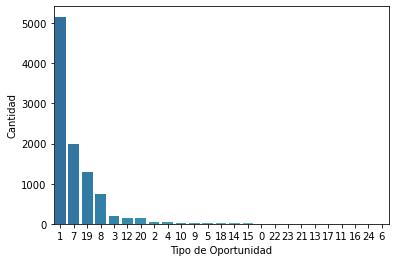

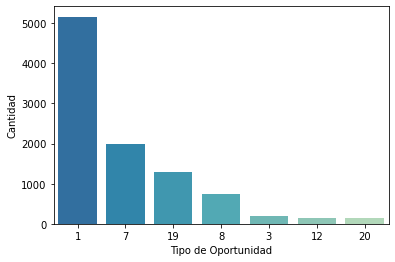

In [4]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,25)
colores = cmap(saltos)

plot = sns.barplot(x="Opportunity_Type",y="Cantidad",data=opTypes,order=opTypes["Opportunity_Type"], palette=colores)
plt.xlabel("Tipo de Oportunidad")
plt.ylabel("Cantidad")
#plt.title("Frecuencia de Opportunity Type")
plt.savefig("img/OpType/CantidadOpTypeSinFiltrar.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot)

saltos = np.linspace(0.7,0.3,7)
colores = cmap(saltos)
opTypes = opTypes[opTypes["Cantidad"] > 100]
plot2 = sns.barplot(x="Opportunity_Type",y="Cantidad",data=opTypes,order=opTypes["Opportunity_Type"], palette=colores)
plt.xlabel("Tipo de Oportunidad")
plt.ylabel("Cantidad")
#plt.title("Frecuencia de Opportunity Type")
plt.savefig("img/OpType/CantidadOpType.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot2)

# OP TYPE VS STAGE

In [5]:
#opTypeVsStage = opportunities.groupby(["Opportunity_Type","Stage"]).agg({"Opportunity_ID":"count"})#Consigo la cantidad de veces de cada OT por cada source
#opTypeVsStage = opTypeVsStage.reset_index()
#opTypeVsStage["Opportunity_Type"] = opTypeVsStage["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
#opTypeVsStage.rename(columns={"Opportunity_ID":"Cantidad"},inplace = True)
#total = opTypeVsStage.groupby("Opportunity_Type").agg({"Cantidad":"sum"}) #La cantidad total de veces que aparece OT
#opTypeVsStage.set_index("Opportunity_Type",inplace=True)
#opTypeVsStage["Total"] = total["Cantidad"]
#opTypeVsStage = opTypeVsStage[opTypeVsStage["Total"]>100]#Filtro a los q tienen mas de 100 entradas
#opTypeVsStage.reset_index(inplace=True)
#opTypeVsStage = opTypeVsStage[(opTypeVsStage["Stage"]=="Closed Won") | (opTypeVsStage["Stage"]=="Closed Lost")]
#opTypeVsStage["Porcentaje"] = opTypeVsStage["Cantidad"]/opTypeVsStage["Total"]
#opTypeVsStage["Opportunity_Type"] = opTypeVsStage["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
#opTypeVsStage

opTypeVsStage = opportunities.pivot_table(columns="Stage",index="Opportunity_Type",values="Opportunity_ID", aggfunc="count").fillna(0)
opTypeVsStage["Total"] = opportunities["Opportunity_Type"].value_counts()
opTypeVsStage = opTypeVsStage.reset_index()
opTypeVsStage["Opportunity_Type"] = opTypeVsStage["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypeVsStage["Closed Won"] = opTypeVsStage["Closed Won"]/opTypeVsStage["Total"]
opTypeVsStage = opTypeVsStage.sort_values(by="Closed Won")
opTypeVsStage = opTypeVsStage[opTypeVsStage["Total"] > 100]
opTypeVsStage.sort_values(by="Closed Won", inplace=True,ascending=False)
opTypeVsStage

Stage,Opportunity_Type,Closed Lost,Closed Won,Negotiation,Proposal,Qualification,Total
4,12,16.0,0.884058,0.0,0.0,0.0,138
23,8,219.0,0.702041,0.0,0.0,0.0,735
22,7,622.0,0.687187,0.0,3.0,0.0,1998
1,1,2460.0,0.517054,10.0,16.0,6.0,5160
18,3,100.0,0.448087,0.0,1.0,0.0,183
13,20,105.0,0.222222,0.0,0.0,0.0,135
11,19,1075.0,0.156954,1.0,8.0,1.0,1287


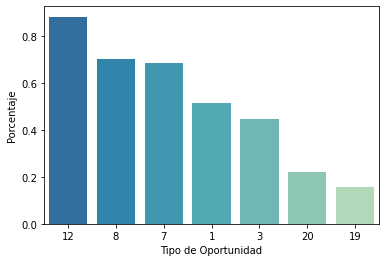

In [11]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,7)
colores = cmap(saltos)

plot = sns.barplot(x="Opportunity_Type",y="Closed Won", data=opTypeVsStage, order=opTypeVsStage["Opportunity_Type"],palette=colores)
#plot.set_xticklabels(plot.get_xticklabels(), rotation=30)
plt.xlabel("Tipo de Oportunidad")
plt.ylabel("Porcentaje")
#plt.title("Porcentaje Oportunidades Ganadas")
plt.savefig("img/OpType/PorcentajeClosedWonPorOpType.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot)

# Op Types vs ASP

In [7]:
#ASP(converted) es siempre USD
opTypesVsASP = opportunities[["Opportunity_Type","ASP_(converted)","Opportunity_ID"]].groupby("Opportunity_Type").\
            agg({"ASP_(converted)":"mean","Opportunity_ID":"count"})
opTypesVsASP.rename(columns={"Opportunity_ID":"Cantidad"},inplace=True)
opTypesVsASP.reset_index(inplace=True)
opTypesVsASP.sort_values(by="Cantidad",inplace=True)
opTypesVsASP = opTypesVsASP[opTypesVsASP["Cantidad"] > 100]
opTypesVsASP["Opportunity_Type"] = opTypesVsASP["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypesVsASP.sort_values(by="ASP_(converted)",inplace=True,ascending=False)
opTypesVsASP

,Opportunity_Type,ASP_(converted),Cantidad
11,19,0.469482,1287
1,1,0.440101,5160
23,8,0.432679,735
22,7,0.431177,1998
13,20,0.418260,135
18,3,0.404088,183
4,12,0.349652,138


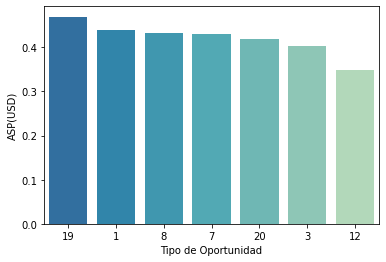

In [8]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,7)
colores = cmap(saltos)

plot = sns.barplot(x="Opportunity_Type",y="ASP_(converted)",data=opTypesVsASP, order=opTypesVsASP["Opportunity_Type"],palette=colores)
plt.xlabel("Tipo de Oportunidad")
plt.ylabel("ASP(USD)")
#plt.title("ASP Por Opportunity Type")
plt.savefig("img/OpType/ASPPorOpType.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot)

# Op Type vs TRF

In [9]:
opTypeVsTRF = opportunities[["Opportunity_Type","TRF","Opportunity_ID"]].groupby("Opportunity_Type").agg({"TRF":"mean","Opportunity_ID":"count"})
opTypeVsTRF = opTypeVsTRF[(opTypeVsTRF["TRF"] > 0) & (opTypeVsTRF["Opportunity_ID"]>100)]
opTypeVsTRF.reset_index(inplace=True)
opTypeVsTRF["Opportunity_Type"] = opTypeVsTRF["Opportunity_Type"].apply(lambda x: x.replace("Opportunity_Type_",""))
opTypeVsTRF = opTypeVsTRF.sort_values(by="TRF",ascending=False)
opTypeVsTRF

,Opportunity_Type,TRF,Opportunity_ID
2,19,16.660451,1287
3,20,7.133333,135
0,1,1.017829,5160
4,3,0.732240,183
1,12,0.326087,138
5,7,0.322322,1998
6,8,0.315646,735


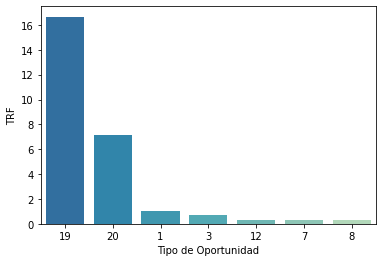

In [10]:
cmap = plt.get_cmap('YlGnBu')
saltos = np.linspace(0.7,0.3,7)
colores = cmap(saltos)

plot = sns.barplot(x="Opportunity_Type",y="TRF",data=opTypeVsTRF,order=opTypeVsTRF["Opportunity_Type"],palette=colores)
plt.xlabel("Tipo de Oportunidad")
plt.ylabel("TRF")
#plt.title("TRF Por Opportunity Type")
plt.savefig("img/OpType/TRFPorOpType.png")#,bbox_inches=tr.Bbox([[0, -0.3],[6,4]]))
plt.show(plot)
#OT 19 y OT 20 son los que venden una cantidad considerable de TRF. 
#Este grafico iria mejor en el analisis de TRF, para comparar que afecta mas a la cantidad. 
#Por ej, aca el OT 19 vende en promedio 16 toneladas, mientras que la source q mas vende
#llega solo a 4, entonces la cantidad de TRF depende mas del OT que del source